## Churn Prediction

In [134]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import missingno as msn
import seaborn as sns
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#### 1. Importing the data

In [3]:
# Importing the data
data=pd.read_csv('telecom.csv')
data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2. Data Exploration

In [11]:
# Data Columns
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [12]:
# Data Shape
data.shape

(3333, 21)

In [14]:
# Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

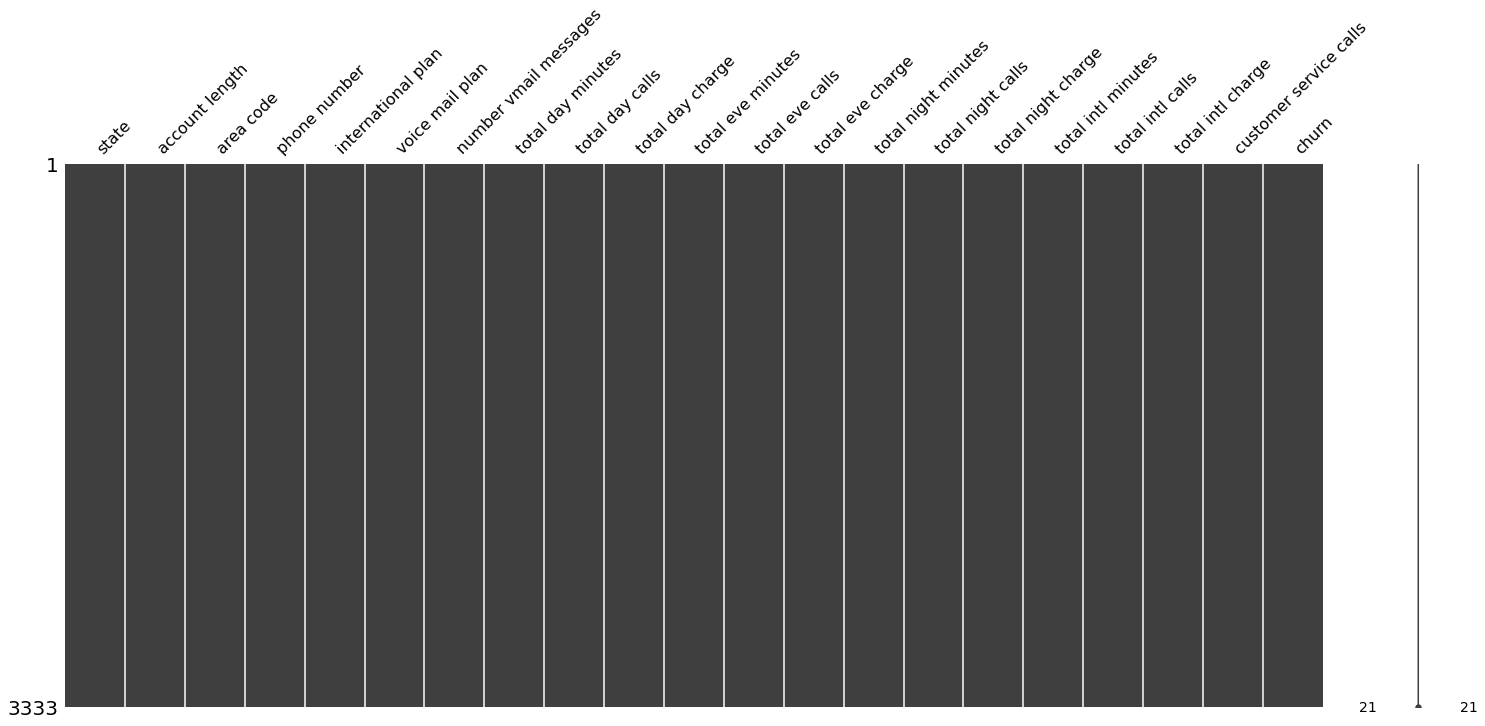

In [17]:
# Checking Null Values (1)
msn.matrix(data);
## No Null values

In [18]:
## Checking Null Values (2)
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### 3. Explaratory Data Analysis


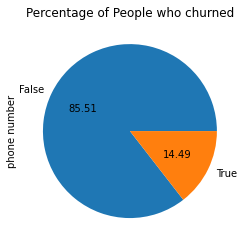

In [60]:
# 3.1 Percentage of people who churn
data.groupby('churn')['phone number'].count().plot(kind='pie', autopct='%.2f');
plt.title('Percentage of People who churned');
## Almost 15% of all phone number churn

In [83]:
# 3.2 Churn and minutes
data.groupby('churn')[['total day minutes','total eve minutes','total night minutes']].mean()
## we can see that peole who churn spend more minutes on calls on average more than those who did not churn

,total day minutes,total eve minutes,total night minutes
churn,,,
False,175.175754,199.043298,200.133193
True,206.914079,212.410145,205.231677


In [87]:
# 3.3 Churn and number of calls
data.groupby('churn')[['total day calls','total eve calls','total night calls']].mean()
## The number of calls on average are almost the same

,total day calls,total eve calls,total night calls
churn,,,
False,100.283158,100.038596,100.058246
True,101.335404,100.561077,100.399586


In [92]:
# 3.4 churn and charges
data.groupby('churn')[['total day charge','total eve charge','total night charge']].mean()
## People who churn are charged more on average more than people who do not especially during the day

,total day charge,total eve charge,total night charge
churn,,,
False,29.780421,16.918909,9.006074
True,35.175921,18.054969,9.235528


In [91]:
# 3.5 Churn and International Services
data.groupby('churn')[['total intl minutes','total intl calls','total intl charge']].mean()
## People who churn get almost the same international services as people who do not 

,total intl minutes,total intl calls,total intl charge
churn,,,
False,10.158877,4.532982,2.743404
True,10.700000,4.163561,2.889545


In [94]:
# 3.6 Churn and number of Voicemails
data.groupby('churn')['number vmail messages'].mean()
## People who do not churn receive more voice messages than those who churn

churn
False    8.604561
True     5.115942
Name: number vmail messages, dtype: float64

#### 4. Feature Engineering

In [124]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [112]:
df=data.copy()

In [113]:
df['international plan'].replace(['no','yes'],[0,1], inplace=True)

In [115]:
df['voice mail plan'].replace(['yes','no'],[1,0], inplace=True)

In [116]:
df['churn'].replace([False,True],[0,1], inplace=True)

#### 5. Pre_Processing and Processing

In [131]:
# 5.1 Defining the Target
X=df[['account length','international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
y=df['churn']

In [132]:
# 5.2 Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=2)

In [133]:
#Training the algorithm
tpot= TPOTClassifier(generations=1,verbosity=2,random_state=42)
tpot.fit(X_train,y_train)

Version 0.11.6.post3 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: 0.9511759519038077

Best pipeline: XGBClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=8, max_features=0.7000000000000001, min_samples_leaf=8, min_samples_split=19, n_estimators=100, subsample=1.0), learning_rate=0.5, max_depth=10, min_child_weight=15, n_estimators=100, n_jobs=1, subsample=0.6500000000000001, verbosity=0)


TPOTClassifier(generations=1, random_state=42, verbosity=2)

In [135]:
model=XGBClassifier()
model.fit(X_train,y_train)

C:\Users\write\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

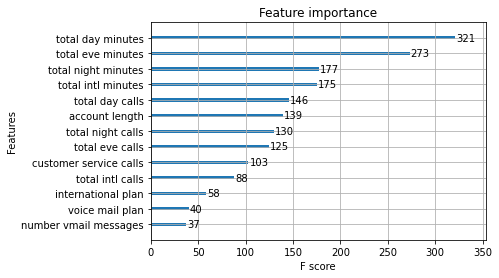

In [136]:
# 5.3 Feature importance
plot_importance(model)
plt.show()